## Donchian Channel

The Donchian Channel is a technical indicator plotting the highest highs and lowest lows over a set period, helping traders identify market volatility, trends, and potential breakout signals.




In [190]:
import numpy as np
import pandas as pd
import yfinance as yf
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings('ignore')

### Official stock data fetching

FXE is an ETF that tracks the FX Pair EUR/USD

In [191]:
asset_ticker = "FXE"

In [192]:
asset = yf.download(asset_ticker, start="2010-01-01").xs(asset_ticker,axis=1,level=1)
asset.drop(columns=['Volume'], inplace=True)
asset.info()

[*********************100%***********************]  1 of 1 completed

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 4031 entries, 2010-01-04 to 2026-01-12
Data columns (total 4 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   Close   4031 non-null   float64
 1   High    4031 non-null   float64
 2   Low     4031 non-null   float64
 3   Open    4031 non-null   float64
dtypes: float64(4)
memory usage: 157.5 KB


### Signal Generation

In [193]:
days_in, days_out = 15, 10

asset['upper'] = asset['High'].rolling(days_in).max()
asset['lower'] = asset['Low'].rolling(days_out).min()
asset

Price,Close,High,Low,Open,upper,lower
Date,,,,,,
2010-01-04,136.915894,137.353696,136.868304,137.172865,NaN,NaN
2010-01-05,136.535202,137.134782,136.335332,136.944439,NaN,NaN
2010-01-06,136.944458,137.125289,136.278250,136.363902,NaN,NaN
2010-01-07,136.068939,136.344935,135.926185,136.278321,NaN,NaN
2010-01-08,136.963516,137.191922,135.878544,136.735096,NaN,NaN
...,...,...,...,...,...,...
2026-01-06,107.830002,108.040001,107.790001,107.959999,108.900002,107.699997
2026-01-07,107.760002,107.919998,107.739998,107.830002,108.900002,107.699997
2026-01-08,107.480003,107.680000,107.400002,107.570000,108.900002,107.400002


In [194]:
asset['entry'] = np.where(asset['Close'] > asset['upper'].shift(1), 1,0)
asset['exit'] = np.where(asset['Close'] < asset['lower'].shift(1), 1,0)

In [195]:
asset['position'] = np.nan
asset.loc[asset['entry'] == 1, 'position'] = 1
asset.loc[asset['exit'] == 1, 'position'] = -1
asset['position'] = asset['position'].ffill().replace(np.nan,0).replace(-1,0)


### Buy & Hold Returns Column

log returns is used because 

In [196]:
asset['simple holding return'] = np.log(asset['Close']).diff()
asset.dropna(inplace=True)
asset.tail()

Price,Close,High,Low,Open,upper,lower,entry,exit,position,simple holding return
Date,,,,,,,,,,
2026-01-06,107.830002,108.040001,107.790001,107.959999,108.900002,107.699997,0,0,1.0,-0.003056
2026-01-07,107.760002,107.919998,107.739998,107.830002,108.900002,107.699997,0,0,1.0,-0.000649
2026-01-08,107.480003,107.680000,107.400002,107.570000,108.900002,107.400002,0,1,0.0,-0.002602
2026-01-09,107.360001,107.430000,107.220001,107.379997,108.900002,107.220001,0,1,0.0,-0.001117
2026-01-12,107.620003,107.820000,107.620003,107.709999,108.900002,107.220001,0,0,0.0,0.002419


### Strategy Return Backtest

In [197]:
asset['strategy_return'] = asset['simple holding return'] * asset['position'].shift(1)

In [198]:
asset.iloc[300:400,:]

Price,Close,High,Low,Open,upper,lower,entry,exit,position,simple holding return,strategy_return
Date,,,,,,,,,,,
2011-04-01,134.831863,135.079326,133.308979,133.718260,135.079326,133.185181,0,0,1.0,0.003536,0.003536
2011-04-04,134.803284,135.107852,134.603400,134.993641,135.107852,133.185181,0,0,1.0,-0.000212,-0.000212
2011-04-05,134.841385,135.050782,134.175128,134.222721,135.107852,133.185181,0,0,1.0,0.000283,0.000283
2011-04-06,135.859833,136.040662,135.345853,135.460079,136.040662,133.185181,1,0,1.0,0.007525,0.007525
2011-04-07,135.602814,135.755105,135.164980,135.231613,136.040662,133.185181,0,0,1.0,-0.001894,-0.001894
...,...,...,...,...,...,...,...,...,...,...,...
2011-08-17,137.052551,137.834028,136.919130,137.529057,137.834028,133.983819,0,0,0.0,0.001949,0.000000
2011-08-18,136.118637,136.280647,135.499171,136.261583,137.834028,134.136388,0,0,0.0,-0.006838,-0.000000
2011-08-19,136.661835,137.205058,136.518889,136.785731,137.834028,134.136388,0,0,0.0,0.003983,0.000000


### Strategy Buy-Sell Chart

In [199]:
asset['pos_change'] = asset['position'].diff()

Text(0.5, 1.0, 'FXE under Donchian Strategy')

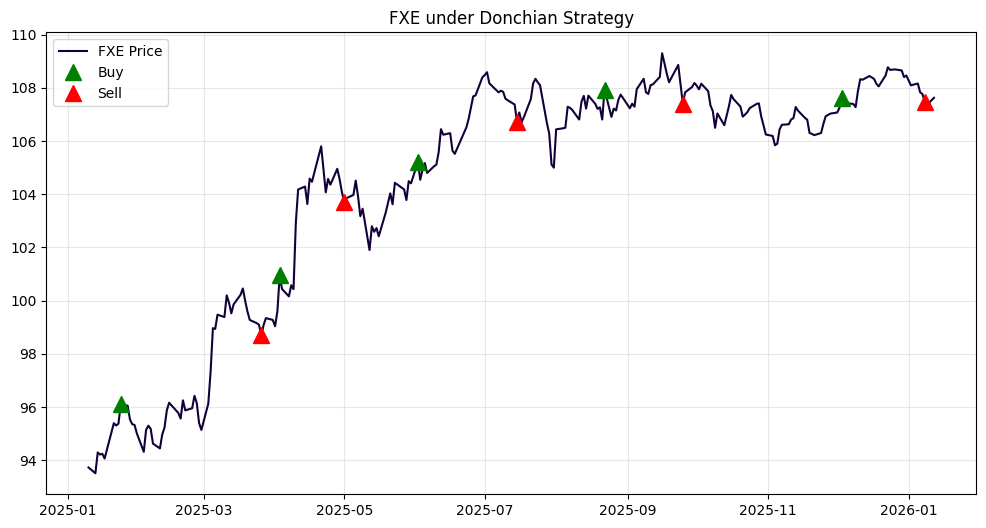

In [200]:
plt.grid(True, alpha = 0.3)
plt.plot(asset.iloc[-252:,:]['Close'], label = f'{asset_ticker} Price', color="#13003A")
plt.plot(asset.iloc[-252:,:][asset['pos_change'] == 1].index, 
         asset.iloc[-252:,:][asset['pos_change'] == 1]['Close'], '^', 
         color='g', markersize=12, label = 'Buy')
plt.plot(asset.iloc[-252:,:][asset['pos_change'] == -1].index, 
         asset.iloc[-252:,:][asset['pos_change'] == -1]['Close'],
         '^', color = 'r', markersize = 12, label = 'Sell')
plt.legend()
plt.title(f'{asset_ticker} under Donchian Strategy')

### Backtesting & Returns Analysis

Text(0.5, 1.0, 'Backtesting Result Plot for FXE')

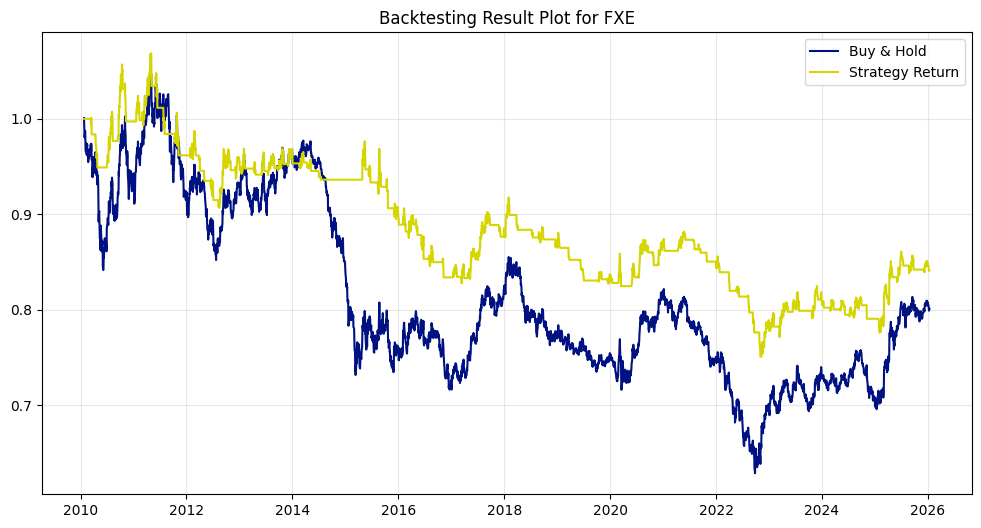

In [201]:
plt.rcParams['figure.figsize'] = 12, 6
plt.plot(np.exp(asset['simple holding return']).cumprod(), label = 'Buy & Hold', color = "#001181")
plt.plot(np.exp(asset['strategy_return']).cumprod(), label = 'Strategy Return', color = "#D5D500")
plt.legend()
plt.grid(True, alpha = 0.3)
plt.title(f'Backtesting Result Plot for {asset_ticker}')

In [202]:
buy_hold_returns = np.exp(asset['simple holding return']).cumprod()-1
buy_hold_returns

Date
2010-01-25    0.000850
2010-01-26   -0.004180
2010-01-27   -0.008361
2010-01-28   -0.011903
2010-01-29   -0.019484
                ...   
2026-01-06   -0.197259
2026-01-07   -0.197780
2026-01-08   -0.199864
2026-01-09   -0.200758
2026-01-12   -0.198822
Name: simple holding return, Length: 4017, dtype: float64

In [203]:
strategy_returns = np.exp(asset['strategy_return']).cumprod()-1
strategy_returns

Date
2010-01-25         NaN
2010-01-26    0.000000
2010-01-27    0.000000
2010-01-28    0.000000
2010-01-29    0.000000
                ...   
2026-01-06   -0.156141
2026-01-07   -0.156689
2026-01-08   -0.158880
2026-01-09   -0.158880
2026-01-12   -0.158880
Name: strategy_return, Length: 4017, dtype: float64